In [37]:
%matplotlib inline

# Random Walk
This notebook simulates a random walk for some amount of particles. This can be plugged into the FCS notebook to calculate diffusion constants of the random walk particles, as a sanity check.

The core object used in the virtual FCS notebook is a Trajectory object.

## Trajectory Attributes
#### `Trajectory.xyz[frame_index, atom_index]`
2-D Numpy array storing tuples of (X,Y,Z) coordinates for each atom `atom_index` at each time step `frame_index

#### `Trajectory.topology.n_residues`
Integer, number of residues/atoms. Equivalent for this purpose

#### `Trajectory.topology.atoms`
List of `atom` objects. Each `atom` object should have an attribute `atom.index` that's its index in the Trajectory, for use in `Trajectory.xyz`


## Random Walk Parameters

In [38]:
N_WALKERS = 1000

TSTEPS = 50000

D = 8

In [39]:
import numpy as np
import matplotlib.pyplot as plt

### Initialize Simulation

### Run simulation

In [40]:
%%time
d_scaling = np.sqrt(4*D)

xyz = np.full(shape=(TSTEPS, N_WALKERS, 3), fill_value=[0.0,0.0,0.0])
_MSD = np.sqrt(TSTEPS)

for w in range(N_WALKERS):
    
    xyz[1:,w,0] = np.cumsum(np.cos(np.random.uniform(0,2,TSTEPS-1)*np.pi) * d_scaling )
    xyz[1:,w,1] = np.cumsum(np.sin(np.random.uniform(0,2,TSTEPS-1)*np.pi) * d_scaling )
    
    # Add initial offset
    xyz[:,w,0] += np.random.uniform(-_MSD,_MSD)
    xyz[:,w,1] += np.random.uniform(-_MSD,_MSD)

CPU times: user 5.25 s, sys: 72 ms, total: 5.32 s
Wall time: 5.32 s


## Calculate Diffusion Constant

In [41]:
MSD = np.mean([(xyz[TSTEPS-1,w,0]-xyz[0,w,0])**2 + (xyz[0,w,1] - xyz[TSTEPS-1,w,1])**2 for w in range(N_WALKERS)])

print("MSD should be %f, is %f" % (TSTEPS * 4 * D, MSD))
print("D is set to %f, calculated at %f" % (D, MSD/(4 * TSTEPS)))

MSD should be 1600000.000000, is 1542149.705697
D is set to 8.000000, calculated at 7.710749


In [42]:
xyz[1,1] 


class Atom:
    
    def setIndex(self, i):
        self.index = i
        
class Topology:
    
    def __init__(self, residues):
        self.n_residues = residues
        
class FakeTrajectory:
    
    def initialize(self, coords, walkers):
        self.topology = Topology(walkers)

        self.topology.atoms = list([Atom() for i in range(walkers)])
        for i in range(walkers):
            self.topology.atoms[i].setIndex(i)

        self.topology.n_residues = walkers

        self.xyz = coords
        
    def __len__(self):
        
        return len(self.xyz)
    
print(len(xyz))
t = FakeTrajectory()
t.initialize(xyz, N_WALKERS)

print(len(t.xyz))
print(t.topology.n_residues)
print(t.topology.atoms[3].index)

with open('../../windrive/linux/output.pkl', 'wb') as output:
    import pickle
    pickle.dump(t, output)

50000
50000
1000
3


## Plot Walks

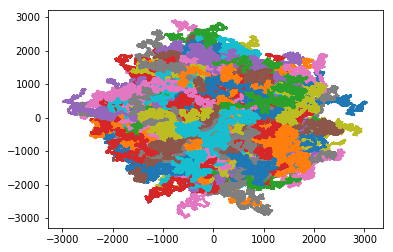

In [43]:
for w in range(N_WALKERS):

    plt.plot(xyz[:,w,0], xyz[:,w,1], linestyle='-')